In [110]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [111]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [112]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [113]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [114]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(autoload_with=engine)


In [115]:
# View all of the classes that automap found

Base.classes.keys()


['station', 'measurement']

In [116]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station


In [117]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [118]:
# Find the most recent date in the data set.

recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(recent_date)

('2017-08-23',)


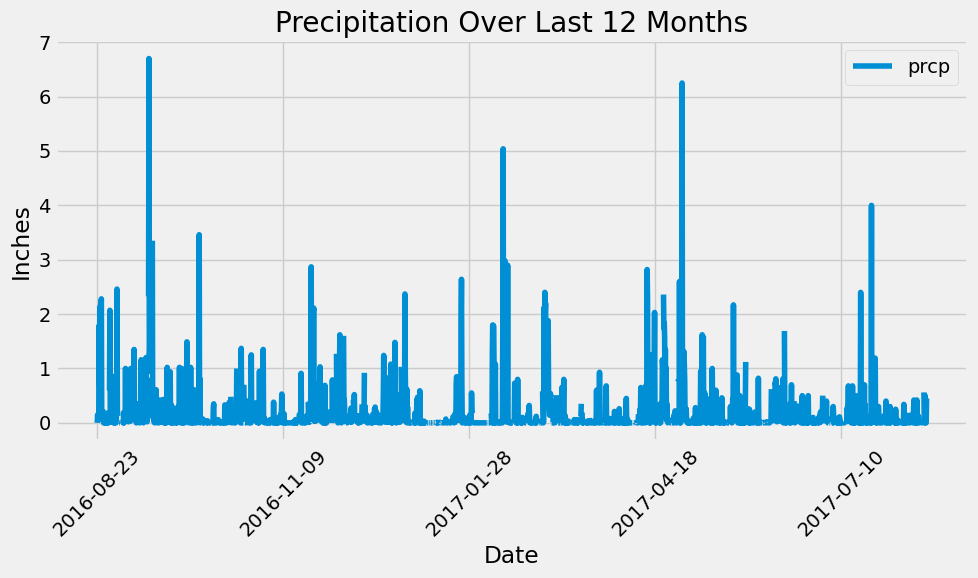

In [119]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent_date_converted = dt.datetime.strptime(recent_date[0], '%Y-%m-%d').date() # using the string parse time method to grab the most recent date

# Calculate the date one year from the last date in data set.

query_date = recent_date_converted - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores

precipitation_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()
	
# Save the query results as a Pandas DataFrame with date and precipitation columns
precipitation_df = pd.DataFrame(precipitation_results, columns=['date', 'prcp'])

# Sort the DataFrame values by date
precipitation_df = precipitation_df.sort_values('date')

# Plot the DataFrame using date as x and precipitation as y
precipitation_df.plot('date', 'prcp', figsize=(10,6), rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over Last 12 Months')
plt.tight_layout()
plt.show()


In [120]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [121]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.station).distinct().count()

station_count

9

In [122]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [104]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
	filter(measurement.station == active_stations[0][0]).all()

most_active_station

[(54.0, 85.0, 71.66378066378067)]

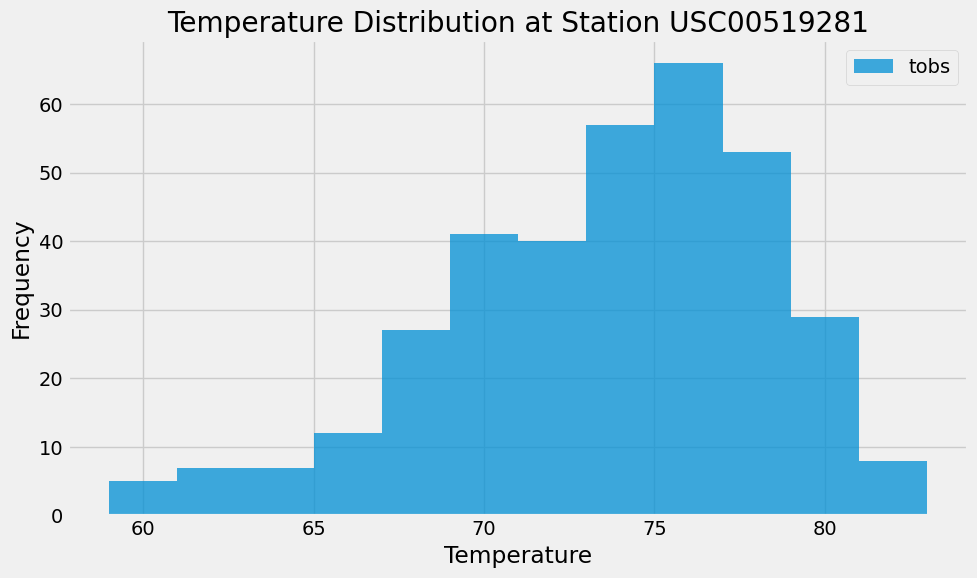

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query temperature data for most active station
temperature_results = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == active_stations[0][0]).\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame with column names
temperature_df = pd.DataFrame(temperature_results, columns=['date', 'tobs'])

# Create histogram of temperature observations
plt.figure(figsize=(10,6))
plt.hist(temperature_df['tobs'], bins=12, alpha=0.75, label= 'tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Distribution at Station {active_stations[0][0]}')
plt.tight_layout()
plt.legend()
plt.show()

# Close Session

In [123]:
# Close Session
session.close()